Water Oxygen indices: [   14    17    20 ... 11642 11645 11648]
Sodium Ion indices: [0 1 2 3 4 5 6]
Chloride Ion indices: [ 7  8  9 10 11 12 13]


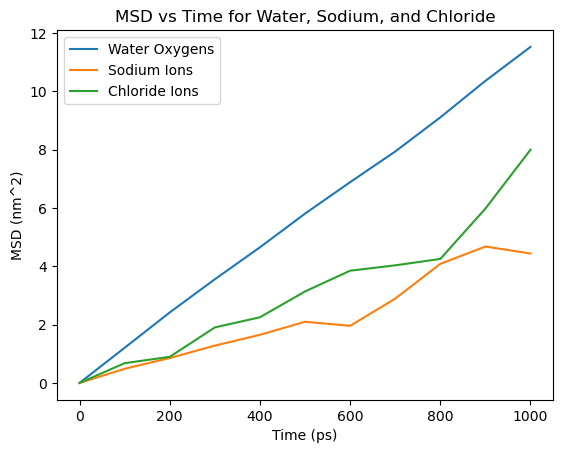

In [22]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

### Again, Jialong thank you ChatGPT for helping me debug --- JWANG Oct 2, 2024 ###

# Load the trajectory (.xtc) and topology (.gro)
traj = md.load_xtc('unwrapped.xtc', 
                   top='../2d_IONSINWATER_SETUP_GITHUB_UPLOADED_PURPOSE/step5_5.gro')

# Select atoms for water oxygens, sodium ions, and chloride ions
water_oxygens = traj.top.select('name O')
sodium_ions = traj.top.select('name SOD')
chloride_ions = traj.top.select('name CLA')

# Debug: Print out the atom indices to check if the selections are valid
print("Water Oxygen indices:", water_oxygens)
print("Sodium Ion indices:", sodium_ions)
print("Chloride Ion indices:", chloride_ions)

# Atom slices
water_traj = traj.atom_slice(water_oxygens)
sodium_traj = traj.atom_slice(sodium_ions)
chloride_traj = traj.atom_slice(chloride_ions)

# Function to calculate MSD
def calculate_msd(traj):
    # Get the positions of atoms over time
    positions = traj.xyz
    # Calculate the displacement from the initial positions
    displacement = positions - positions[0]
    # Calculate the squared displacement
    squared_displacement = np.square(displacement)
    # Sum the squared displacement over all atoms and spatial dimensions
    msd = np.mean(squared_displacement, axis=(1, 2))  # Average over atoms and xyz dimensions
    return msd

# Calculate MSD for each group
msd_water = calculate_msd(water_traj)
msd_sodium = calculate_msd(sodium_traj)
msd_chloride = calculate_msd(chloride_traj)

# Extract time in ps
time = traj.time  # MDTraj provides time in ps by default

# Plot MSD vs time
plt.figure()
plt.plot(time, msd_water, label='Water Oxygens')
plt.plot(time, msd_sodium, label='Sodium Ions')
plt.plot(time, msd_chloride, label='Chloride Ions')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.title('MSD vs Time for Water, Sodium, and Chloride')
plt.legend()
plt.savefig('../2c_IONSINWATER_FIGURES/MSD_water_sodium_chloride.png')
plt.show()